In [220]:
df=pd.read_pickle('italian_review_551.pkl')
df=df.dropna()
df0=df[df['label']==0]
df1=df[df['label']==1]
df2=df[df['label']==2]
df3=df[df['label']==3]
df4=df[df['label']==4]

def get_sentiment_analysis(df):
    import pandas as pd
    def get_nrc_data():
        nrc = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
        count=0
        emotion_dict=dict()
        with open(nrc,'r') as f:
            all_lines = list()
            for line in f:
                if count < 46:
                    count+=1
                    continue
                line = line.strip().split('\t')
                if int(line[2]) == 1:
                    if emotion_dict.get(line[0]):
                        emotion_dict[line[0]].append(line[1])
                    else:
                        emotion_dict[line[0]] = [line[1]]
        return emotion_dict
    emotion_dict=get_nrc_data()

    def emotion_analyzer(text,emotion_dict):
        #Set up the result dictionary
        emotions = {x for y in emotion_dict.values() for x in y}
        emotion_count = dict()
        for emotion in emotions:
            emotion_count[emotion] = 0

        #Analyze the text and normalize by total number of words
        total_words = len(text.split())
        for word in text.split():
            if emotion_dict.get(word):
                for emotion in emotion_dict.get(word):
                    emotion_count[emotion] += 1/len(text.split())
        return emotion_count

    def get_sentiment_analysis(df,emotion_dict):
        #import and clean data
        df=df.drop(['price'], axis=1)
        df=df.dropna()
        df=df.reset_index(drop=True)

        output=pd.DataFrame(columns=['Restaurant','Fear','Trust','Negative',
                               'Positive','Joy','Disgust','Anticipation',
                               'Sadness','Surprise'])
        output['Restaurant']=df['alias']
        output.set_index('Restaurant',inplace=True)

        for x in range(len(df['review'])):
            result=emotion_analyzer(df['review'].iloc[x], emotion_dict)
            output.iloc[x]=[result['fear'],result['trust'],
                      result['negative'],result['positive'],result['joy'],result['disgust'],
                      result['anticipation'],result['sadness'],result['surprise']]
        return output

    return get_sentiment_analysis(df,emotion_dict)

    
    

In [ ]:
sentiment=get_sentiment_analysis(df)

In [96]:
sentiment

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise
Restaurant,,,,,,,,,
babbalucci-new-york,0.00348028,0.0273149,0.0125501,0.0437671,0.0260494,0.00316389,0.0226745,0.00558954,0.00790972
pisticci-new-york,0.00384098,0.0299597,0.0107548,0.0492606,0.0320722,0.00316881,0.0231419,0.00499328,0.0113309
vinatería-new-york-4,0.00408197,0.0274075,0.0139953,0.0422359,0.0255748,0.00483172,0.0204932,0.0074142,0.0102466
sottocasa-pizzeria-harlem-new-york,0.00384869,0.0279305,0.0124258,0.0450847,0.0285903,0.00296899,0.0239718,0.00538817,0.00879701
grazie-new-york-3,0.00538581,0.0286898,0.0141895,0.0467115,0.0275505,0.00362506,0.0213361,0.00590368,0.00942517
lido-new-york,0.00601719,0.0324737,0.0101242,0.0496657,0.0311366,0.00219675,0.0207259,0.00487106,0.00840497
fumo-pizza-bar-pasta-new-york-3,0.00512408,0.0275294,0.0101477,0.0484276,0.0305436,0.00251181,0.0241133,0.00452125,0.00854014
max-soha-new-york,0.00620412,0.0298832,0.0125116,0.04529,0.029573,0.00279185,0.0215076,0.00630752,0.00868576
raos-new-york,0.0058304,0.0251111,0.0128153,0.0412746,0.023033,0.00415632,0.016683,0.00594585,0.0106217


In [168]:
def find_top_and_last_review(sentiment):
    sentiment["All_Pos"]=(sentiment['Trust']+sentiment['Positive']+ sentiment['Joy']+ sentiment['Anticipation'])
    sentiment["All_Neg"]=(sentiment['Fear']+sentiment['Negative']+ sentiment['Disgust']+ sentiment['Sadness'])
    sentiment['Net']=sentiment["All_Pos"]-sentiment["All_Neg"]
    sentiment.sort_values(by="Net",ascending=False)['Net']
    top3=(sentiment.sort_values(by="Net",ascending=False)['Net'].index[:3],sentiment.sort_values(by="Net",ascending=False)['Net'][:3])
    last3=(sentiment.sort_values(by="Net",ascending=False)['Net'].index[-3:],sentiment.sort_values(by="Net",ascending=False)['Net'][-3:])
    review_top3=''
    for x in range(3):
        review_top3+=df[df['alias']==top1[0][x]]['review'].values[0]
    review_last3=''
    for x in range(3):
        review_last3+=df[df['alias']==last1[0][x]]['review'].values[0]
    return review_top3,review_last3

In [228]:
def get_cluster_cloud():
    def find_cluster_review(df):
        string=''
        for x in df['review']:
            string+=x
        return string
    
    review0=find_cluster_review(df0)
    review1=find_cluster_review(df1)
    review2=find_cluster_review(df2)
    review3=find_cluster_review(df3)
    review4=find_cluster_review(df4)
    
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    #Remove unwanted words
    #As we look at the cloud, we can get rid of words that don't make sense by adding them to this variable
    DELETE_WORDS = []
    def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
        for word in DELETE_WORDS:
            text_string = text_string.replace(word,' ')
        return text_string

    #Remove short words
    MIN_LENGTH = 0
    def remove_short_words(text_string,min_length = MIN_LENGTH):
        word_list = text_string.split()
        for word in word_list:
            if len(word) < min_length:
                text_string = text_string.replace(' '+word+' ',' ',1)
        return text_string


    #Set up side by side clouds
    COL_NUM = 2
    ROW_NUM = 3
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
    import nltk
    from nltk.stem.porter import PorterStemmer
    from nltk import sent_tokenize,word_tokenize 
    p_stemmer = PorterStemmer()
    text=[review0, review1, review2, review3, review4]
    title=["c0","c1", "c2","c3", "c4"]
    for i in range(5):
        text_string = remove_words(text[i])
        text_string = remove_short_words(text_string)
        ax = axes[i//2, i%2] 
        ax.set_title(title[i])
        wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
        ax.imshow(wordcloud)
    #     else:
    #         striptext = text_string.replace('\xa0', ' ')
    #         striptext = striptext.replace('\'', "'")
    #         sentences = sent_tokenize(striptext)
    #         words = word_tokenize(striptext)
    #         text = nltk.Text([p_stemmer.stem(i).lower() for i in words])
    #         text.dispersion_plot(["service", "food", "price", "place",'taste','pasta','pizza'])
        ax.axis('off')

    plt.show()

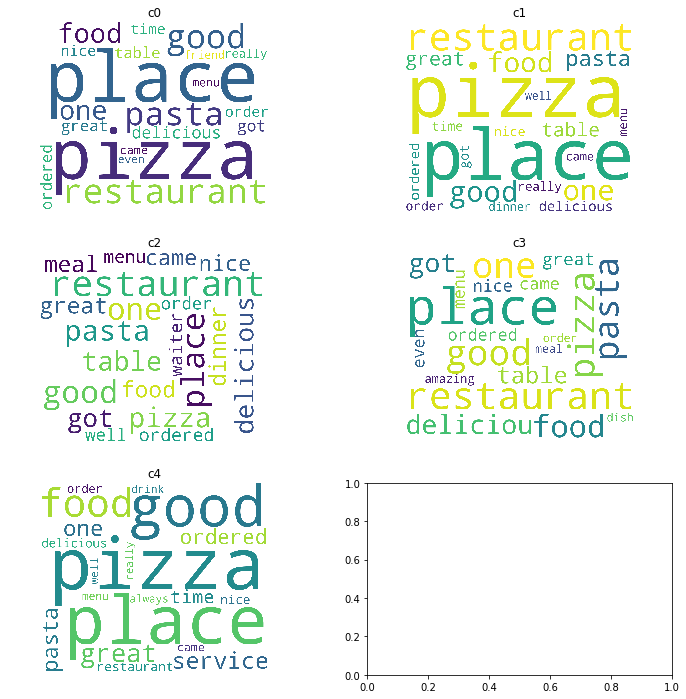

In [229]:
c=get_cluster_cloud()
c